In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
data=pd.read_csv('Transformed_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [4]:
#geo distribution of number of houses sold in King country
# create a base map
basemap = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = data[['Longitude','Latitude']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['Latitude','Longitude']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

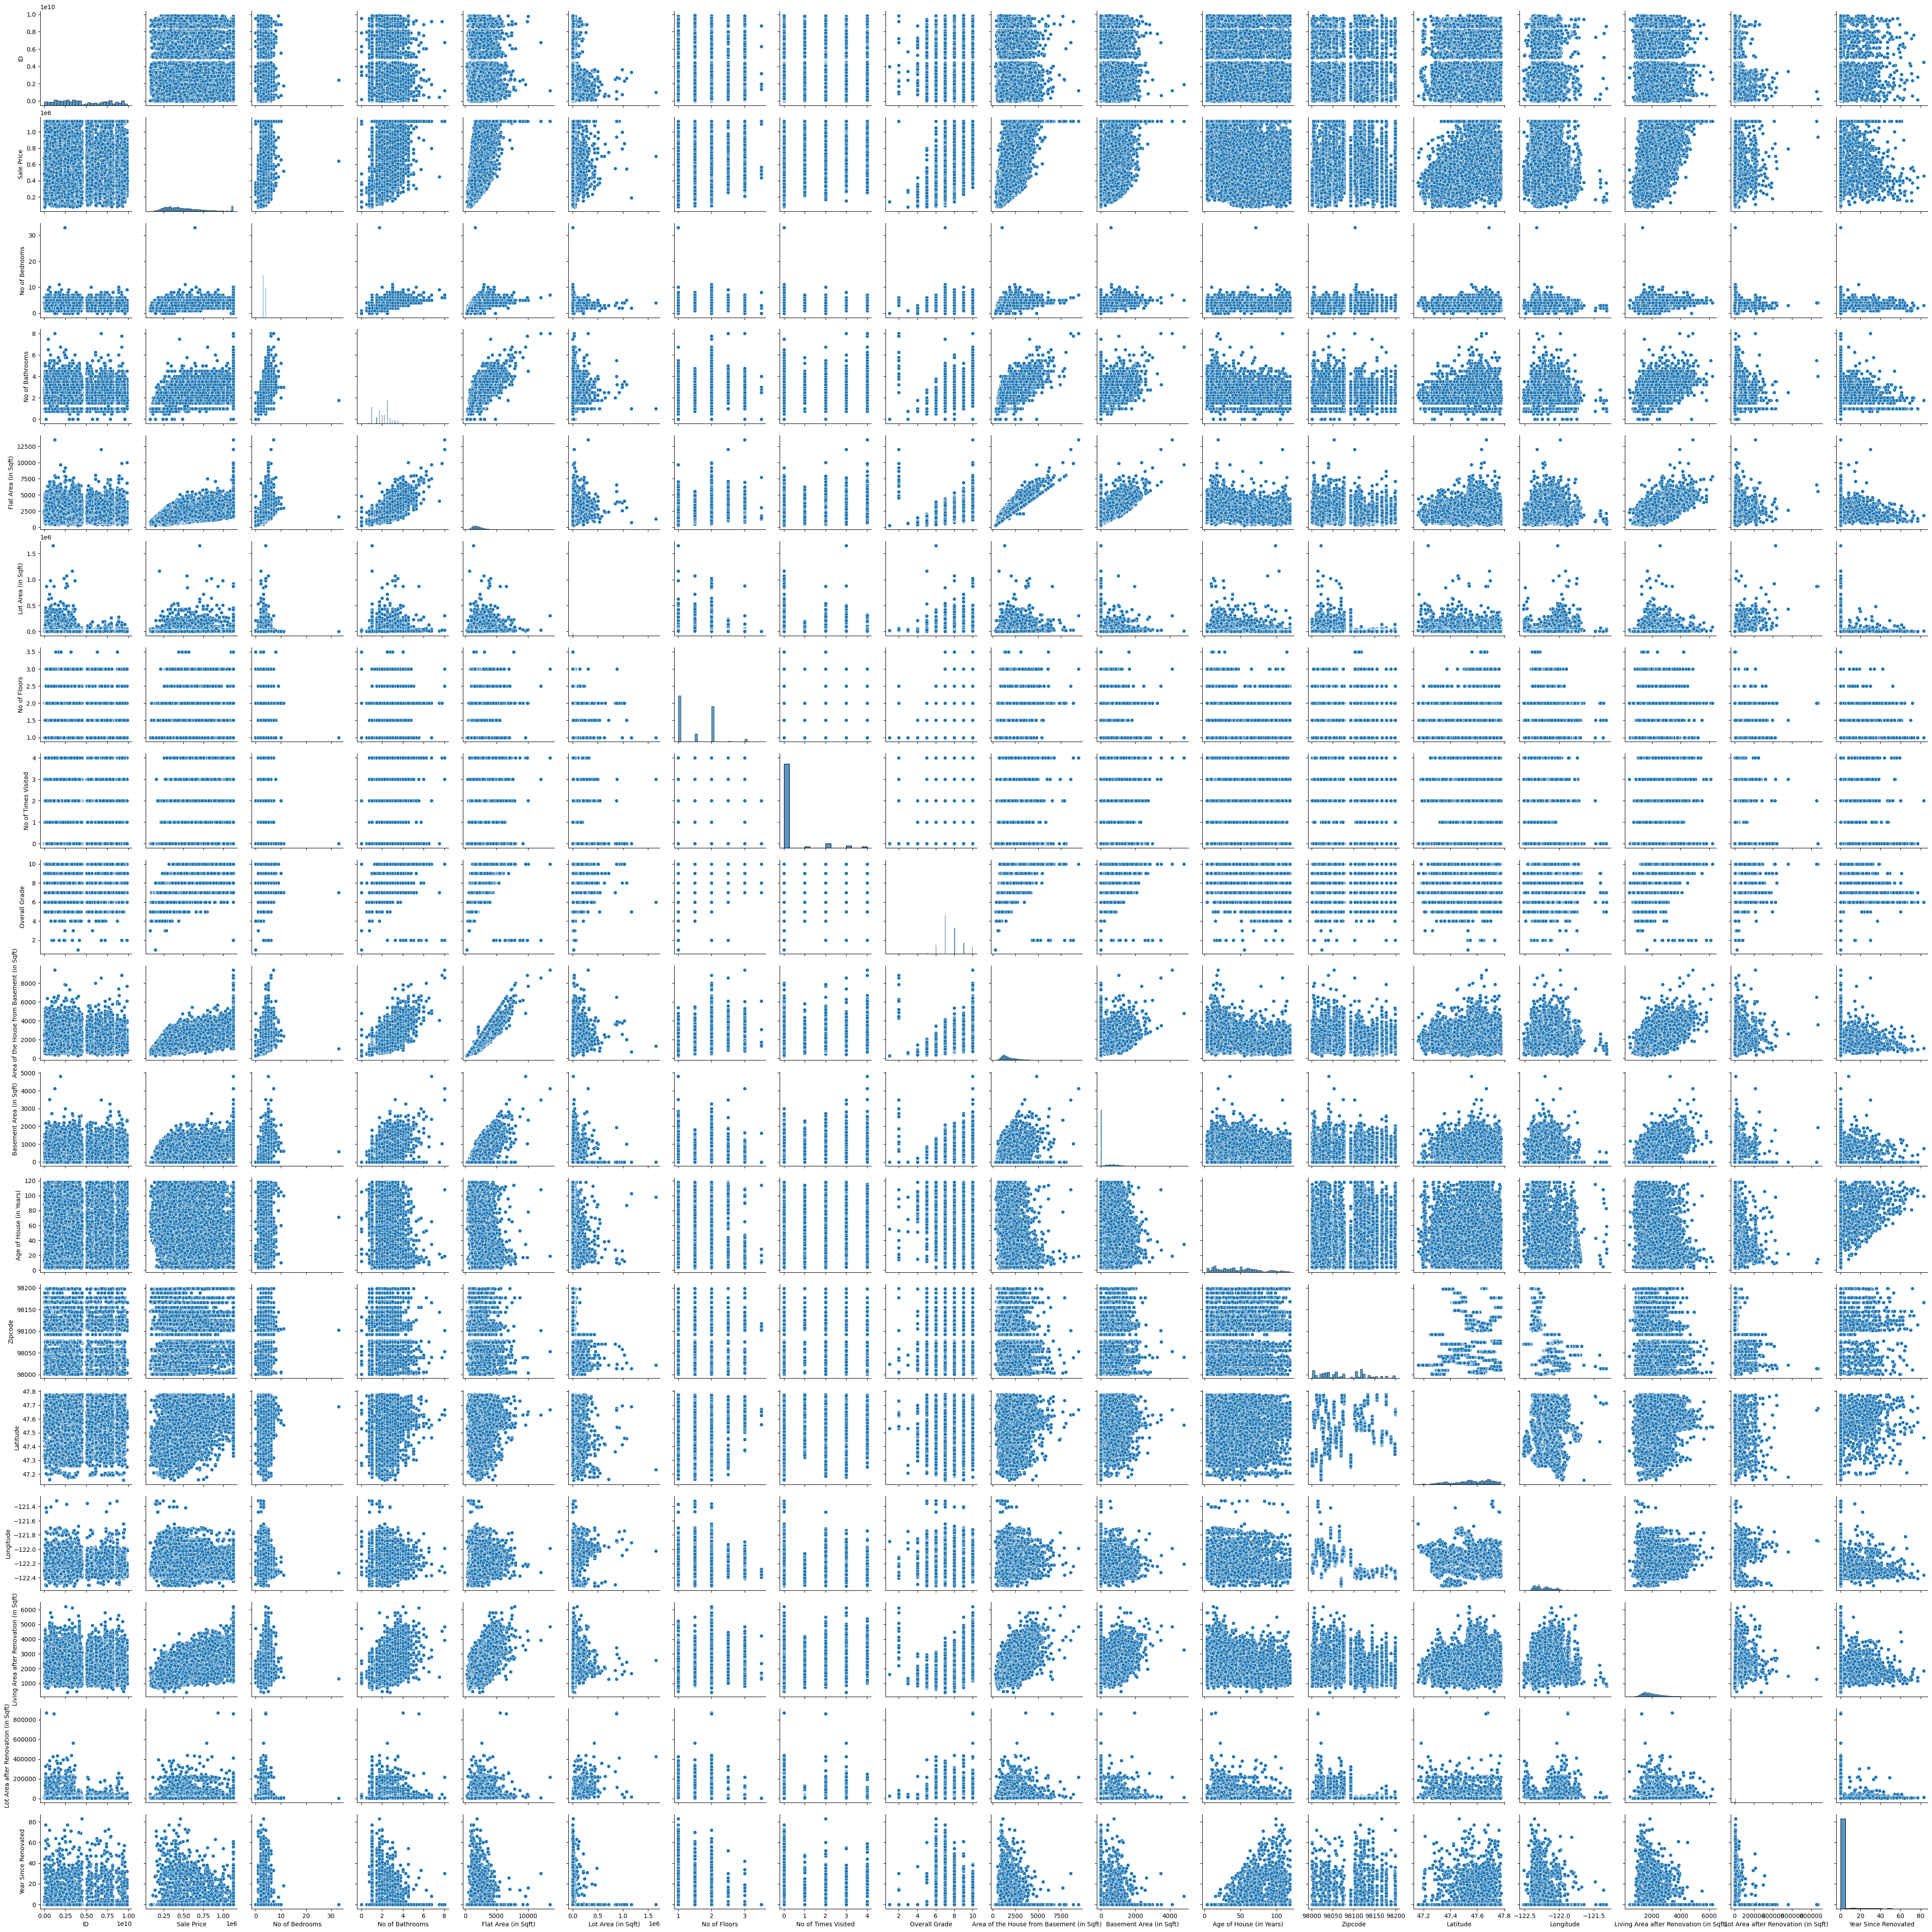

In [5]:
sns.pairplot(data)

In [6]:
data.drop(columns='ID',inplace=True)

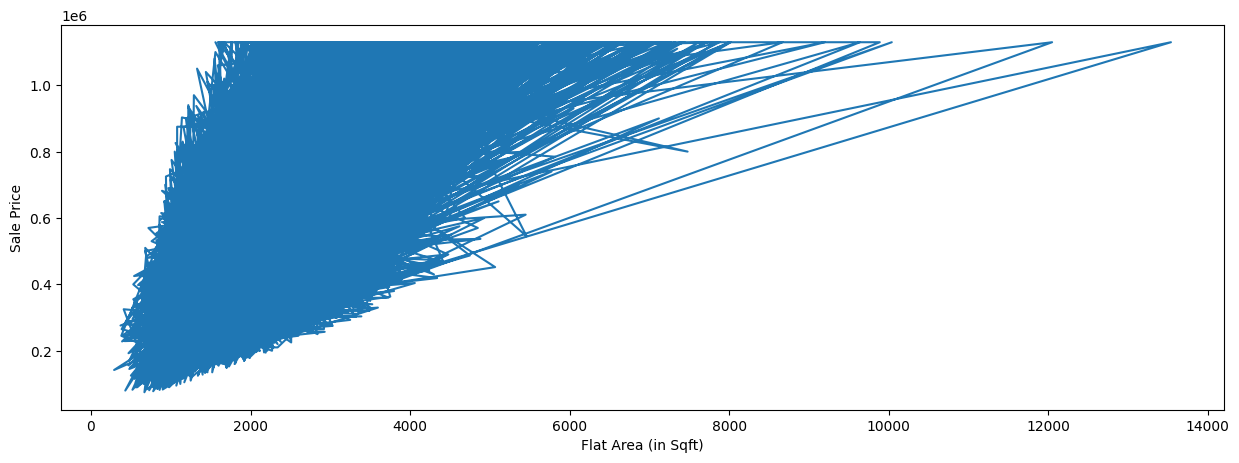

In [7]:
#flat area vs sale price
plt.figure(figsize=(15,5))
plt.plot(data['Flat Area (in Sqft)'],data['Sale Price'])
plt.xlabel('Flat Area (in Sqft)')
plt.ylabel('Sale Price')
plt.show()


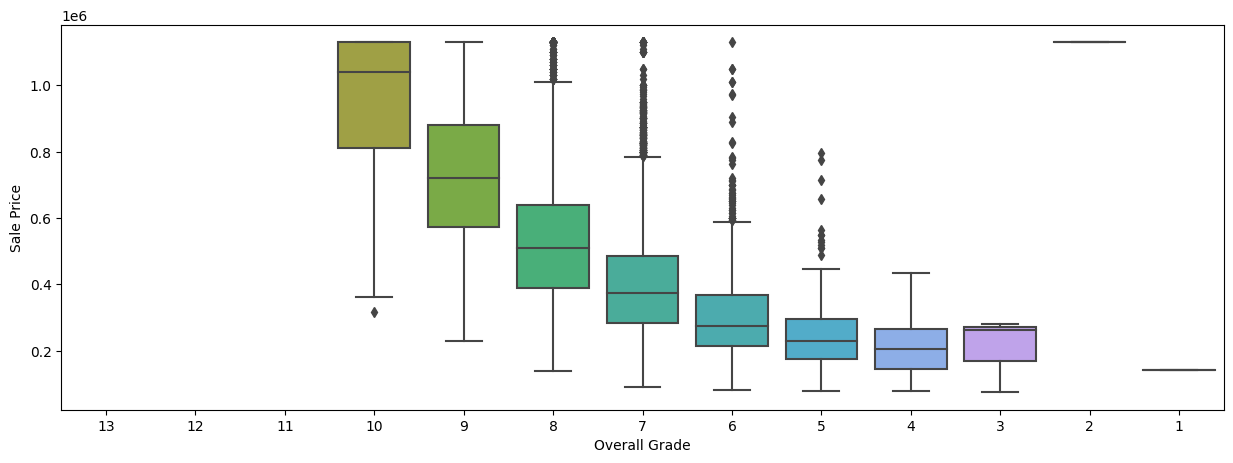

In [8]:
#Overall Grade vs sale price
plt.figure(figsize=(15, 5))
orders = list(reversed(range(1, 14)))
sns.boxplot(x = data['Overall Grade'], y = data['Sale Price'], order = orders)
plt.show()

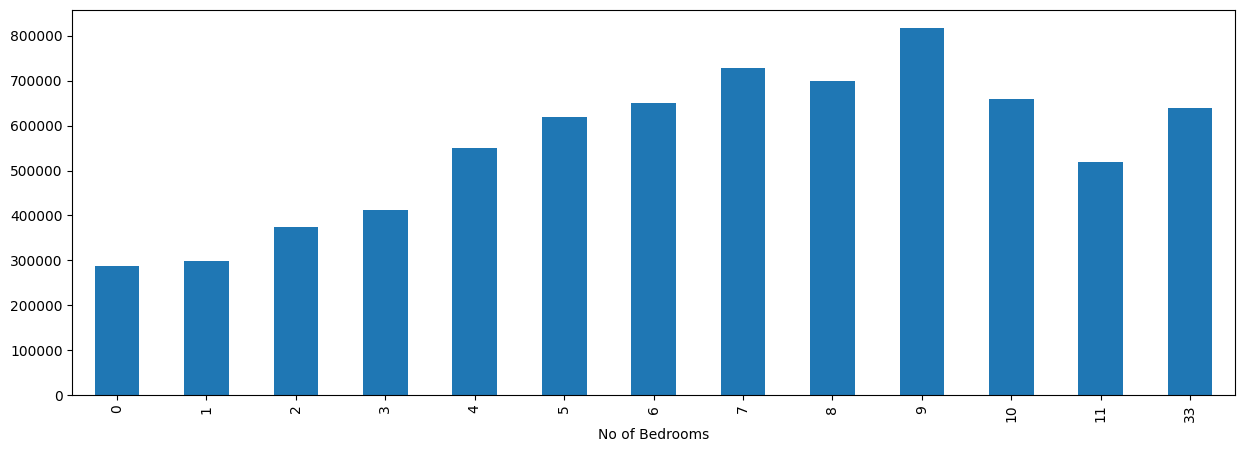

In [9]:
#No of bathroom vs saleprice
price_bathrooms_med = data.groupby("No of Bedrooms")['Sale Price'].median()
price_bathrooms_med.plot.bar(figsize=(15,5))
plt.show()

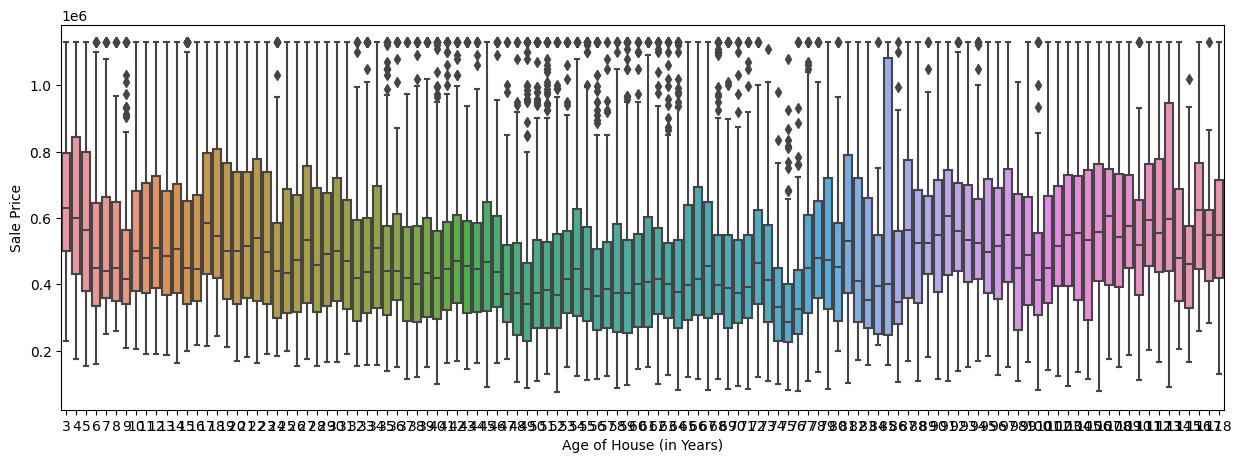

In [10]:
#age of house vs sale price
plt.figure(figsize=(15, 5))
sns.boxplot(x = data['Age of House (in Years)'], y = data['Sale Price'])
plt.show()

In [11]:
#categorical variables - Waterfront View ,Condition of the House,Zipcode,Ever Renovated


In [12]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot: xlabel='Condition of the House'>

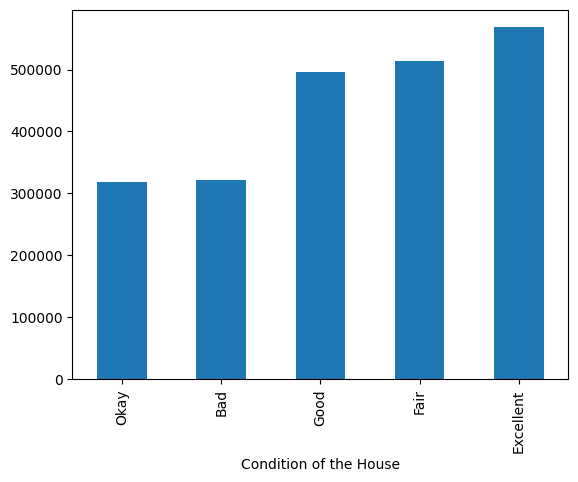

In [13]:
#mean of the sale price corresponding to condition of the house
data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='Waterfront View'>

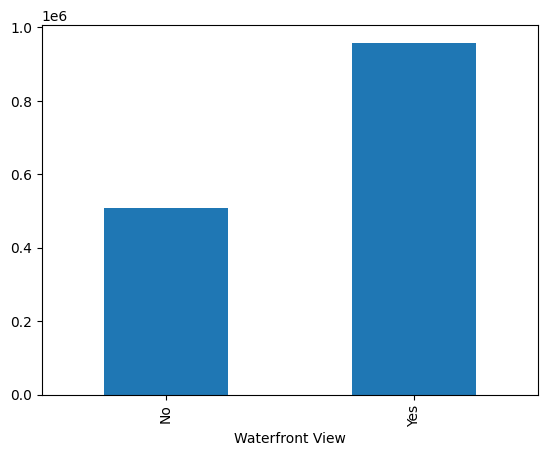

In [14]:
data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='Ever Renovated'>

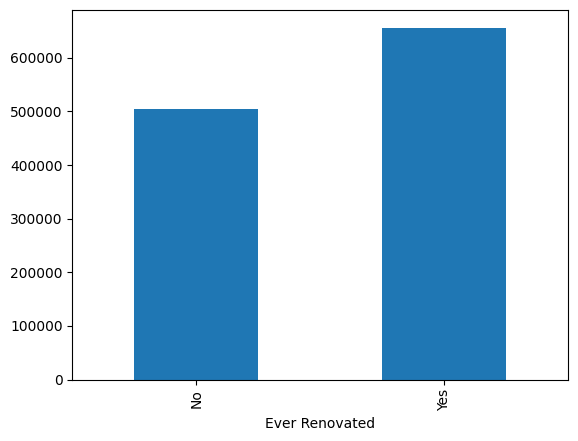

In [15]:
data.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='Zipcode'>

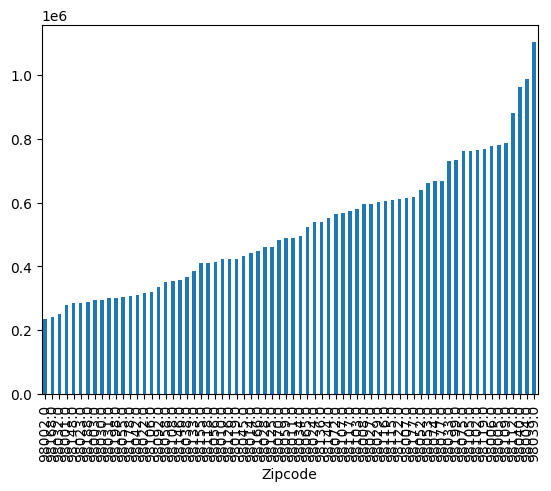

In [16]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind='bar')

In [17]:
#Anova(Used to find relation between categorical and numerical variables)
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [18]:
data=data.rename(columns={'Sale Price':'Sale_Price'})

In [19]:
data=data.rename(columns={'Condition of the House':'Condition_of_the_House'})

In [20]:
data=data.rename(columns={'Waterfront View':'Waterfront_View'})

In [21]:
data=data.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [22]:
data.head()

Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
0    221900.0               3             1.00               1180.0   
1    538000.0               3             2.25               2570.0   
2    180000.0               2             1.00                770.0   
3    604000.0               4             3.00               1960.0   
4    510000.0               3             2.00               1680.0   

   Lot Area (in Sqft)  No of Floors Waterfront_View  No of Times Visited  \
0              5650.0           1.0              No                    0   
1              7242.0           2.0              No                    0   
2             10000.0           1.0              No                    0   
3              5000.0           1.0              No                    0   
4              8080.0           1.0              No                    0   

  Condition_of_the_House  Overall Grade  \
0                   Fair              7   
1                   Fair              7   
2                   Fair              6   
3              Excellent              7   
4                   Fair              8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                     1180.0                        0   
1                                     2170.0                      400   
2                                      770.0                        0   
3                                     1050.0                      910   
4                                     1680.0                        0   

   Age of House (in Years)  Zipcode  Latitude  Longitude  \
0                       63  98178.0   47.5112   -122.257   
1                       67  98125.0   47.7210   -122.319   
2                       85  98028.0   47.7379   -122.233   
3                       53  98136.0   47.5208   -122.393   
4                       31  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft) Ever_Renovated  Year Since Renovated  
0                                 5650             No                     0  
1                                 7639            Yes                    26  
2                                 8062             No                     0  
3                                 5000             No                     0  
4                                 7503             No                     0

In [23]:
data['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#anova
mod=ols('Sale_Price ~ Condition_of_the_House',data=data).fit()

In [25]:
Anova_Table=sm.stats.anova_lm(mod,type=2)

In [26]:
print(Anova_Table)

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


In [27]:
mod=ols('Sale_Price ~ Waterfront_View',data=data).fit()
sm.stats.anova_lm(mod,type=2)

df        sum_sq       mean_sq           F  \
Waterfront_View      1.0  3.283737e+13  3.283737e+13  538.192683   
Residual         21607.0  1.318333e+15  6.101415e+10         NaN   

                        PR(>F)  
Waterfront_View  1.275558e-117  
Residual                   NaN

In [28]:
mod=ols('Sale_Price ~ Ever_Renovated',data=data).fit()
sm.stats.anova_lm(mod,type=2)

df        sum_sq       mean_sq           F        PR(>F)
Ever_Renovated      1.0  1.998463e+13  1.998463e+13  324.378469  5.419055e-72
Residual        21607.0  1.331185e+15  6.160899e+10         NaN           NaN

In [29]:
mod=ols('Sale_Price ~ Zipcode',data=data).fit()
sm.stats.anova_lm(mod,type=2)

df        sum_sq       mean_sq          F        PR(>F)
Zipcode       1.0  2.503765e+12  2.503765e+12  40.112844  2.444308e-10
Residual  21607.0  1.348666e+15  6.241803e+10        NaN           NaN

In [30]:
data=pd.get_dummies(data,columns=['Condition_of_the_House'],drop_first=True)

In [31]:
data.head()

Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
0    221900.0               3             1.00               1180.0   
1    538000.0               3             2.25               2570.0   
2    180000.0               2             1.00                770.0   
3    604000.0               4             3.00               1960.0   
4    510000.0               3             2.00               1680.0   

   Lot Area (in Sqft)  No of Floors Waterfront_View  No of Times Visited  \
0              5650.0           1.0              No                    0   
1              7242.0           2.0              No                    0   
2             10000.0           1.0              No                    0   
3              5000.0           1.0              No                    0   
4              8080.0           1.0              No                    0   

   Overall Grade  Area of the House from Basement (in Sqft)  ...  Latitude  \
0              7                                     1180.0  ...   47.5112   
1              7                                     2170.0  ...   47.7210   
2              6                                      770.0  ...   47.7379   
3              7                                     1050.0  ...   47.5208   
4              8                                     1680.0  ...   47.6168   

   Longitude  Living Area after Renovation (in Sqft)  \
0   -122.257                                  1340.0   
1   -122.319                                  1690.0   
2   -122.233                                  2720.0   
3   -122.393                                  1360.0   
4   -122.045                                  1800.0   

   Lot Area after Renovation (in Sqft)  Ever_Renovated  Year Since Renovated  \
0                                 5650              No                     0   
1                                 7639             Yes                    26   
2                                 8062              No                     0   
3                                 5000              No                     0   
4                                 7503              No                     0   

   Condition_of_the_House_Excellent Condition_of_the_House_Fair  \
0                                 0                           1   
1                                 0                           1   
2                                 0                           1   
3                                 1                           0   
4                                 0                           1   

   Condition_of_the_House_Good  Condition_of_the_House_Okay  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  

[5 rows x 23 columns]

In [32]:
data=pd.get_dummies(data,columns=['Waterfront_View'],drop_first=True)

In [33]:
data=pd.get_dummies(data,columns=['Ever_Renovated'],drop_first=True)

In [34]:
# binning zipcode
Zip_Table=data.groupby('Zipcode').agg({'Sale_Price':'mean'}) .sort_values('Sale_Price',ascending = True)

In [35]:
Zip_Table.head()

Sale_Price
Zipcode               
98002.0  234284.035176
98168.0  240328.371747
98032.0  251296.240000
98001.0  280804.690608
98148.0  284908.596491

In [36]:
Zip_Table['Zipcode_Group']=pd.cut(Zip_Table['Sale_Price'],bins=10,labels=['Zipcode_Group_0','Zipcode_Group_1','Zipcode_Group_2','Zipcode_Group_3','Zipcode_Group_4','Zipcode_Group_5','Zipcode_Group_6','Zipcode_Group_7','Zipcode_Group_8','Zipcode_Group_9'],include_lowest=True)

In [37]:
Zip_Table=Zip_Table.drop(columns='Sale_Price')

In [38]:
data=pd.merge(data,Zip_Table,left_on='Zipcode',how='left',right_index=True)

In [39]:
data=data.drop(columns='Zipcode')

In [40]:
data.head()

Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
0    221900.0               3             1.00               1180.0   
1    538000.0               3             2.25               2570.0   
2    180000.0               2             1.00                770.0   
3    604000.0               4             3.00               1960.0   
4    510000.0               3             2.00               1680.0   

   Lot Area (in Sqft)  No of Floors  No of Times Visited  Overall Grade  \
0              5650.0           1.0                    0              7   
1              7242.0           2.0                    0              7   
2             10000.0           1.0                    0              6   
3              5000.0           1.0                    0              7   
4              8080.0           1.0                    0              8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  ...  \
0                                     1180.0                        0  ...   
1                                     2170.0                      400  ...   
2                                      770.0                        0  ...   
3                                     1050.0                      910  ...   
4                                     1680.0                        0  ...   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  Year Since Renovated  \
0                                 5650                     0   
1                                 7639                    26   
2                                 8062                     0   
3                                 5000                     0   
4                                 7503                     0   

   Condition_of_the_House_Excellent  Condition_of_the_House_Fair  \
0                                 0                            1   
1                                 0                            1   
2                                 0                            1   
3                                 1                            0   
4                                 0                            1   

   Condition_of_the_House_Good  Condition_of_the_House_Okay  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Waterfront_View_Yes  Ever_Renovated_Yes    Zipcode_Group  
0                    0                   0  Zipcode_Group_0  
1                    0                   1  Zipcode_Group_2  
2                    0                   0  Zipcode_Group_2  
3                    0                   0  Zipcode_Group_3  
4                    0                   0  Zipcode_Group_4  

[5 rows x 23 columns]

In [41]:
data=pd.get_dummies(data,columns=['Zipcode_Group'],drop_first=True)

In [42]:
data.head()

Sale_Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  \
0    221900.0               3             1.00               1180.0   
1    538000.0               3             2.25               2570.0   
2    180000.0               2             1.00                770.0   
3    604000.0               4             3.00               1960.0   
4    510000.0               3             2.00               1680.0   

   Lot Area (in Sqft)  No of Floors  No of Times Visited  Overall Grade  \
0              5650.0           1.0                    0              7   
1              7242.0           2.0                    0              7   
2             10000.0           1.0                    0              6   
3              5000.0           1.0                    0              7   
4              8080.0           1.0                    0              8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  ...  \
0                                     1180.0                        0  ...   
1                                     2170.0                      400  ...   
2                                      770.0                        0  ...   
3                                     1050.0                      910  ...   
4                                     1680.0                        0  ...   

   Ever_Renovated_Yes  Zipcode_Group_Zipcode_Group_1  \
0                   0                              0   
1                   1                              0   
2                   0                              0   
3                   0                              0   
4                   0                              0   

   Zipcode_Group_Zipcode_Group_2  Zipcode_Group_Zipcode_Group_3  \
0                              0                              0   
1                              1                              0   
2                              1                              0   
3                              0                              1   
4                              0                              0   

   Zipcode_Group_Zipcode_Group_4  Zipcode_Group_Zipcode_Group_5  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              1                              0   

   Zipcode_Group_Zipcode_Group_6  Zipcode_Group_Zipcode_Group_7  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Zipcode_Group_Zipcode_Group_8  Zipcode_Group_Zipcode_Group_9  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 31 columns]

In [43]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0       -0.398724        -1.447497            -0.979989           -0.228368   
1       -0.398724         0.175717             0.533645           -0.189935   
2       -1.474115        -1.447497            -1.426456           -0.123352   
3        0.676667         1.149646            -0.130612           -0.244060   
4       -0.398724        -0.148926            -0.435516           -0.169704   

   No of Floors  No of Times Visited  Overall Grade  \
0     -0.915389             -0.30579      -0.563993   
1      0.936817             -0.30579      -0.563993   
2     -0.915389             -0.30579      -1.468566   
3     -0.915389             -0.30579      -0.563993   
4     -0.915389             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734765                -0.658697   
1                                   0.460954                 0.245134   
2                                  -1.229961                -0.658697   
3                                  -0.891778                 1.397518   
4                                  -0.130866                -0.658697   

   Age of House (in Years)  ...  Ever_Renovated_Yes  \
0                 0.544734  ...           -0.210155   
1                 0.680915  ...            4.758385   
2                 1.293731  ...           -0.210155   
3                 0.204281  ...           -0.210155   
4                -0.544715  ...           -0.210155   

   Zipcode_Group_Zipcode_Group_1  Zipcode_Group_Zipcode_Group_2  \
0                      -0.350481                      -0.482158   
1                      -0.350481                       2.074011   
2                      -0.350481                       2.074011   
3                      -0.350481                      -0.482158   
4                      -0.350481                      -0.482158   

   Zipcode_Group_Zipcode_Group_3  Zipcode_Group_Zipcode_Group_4  \
0                      -0.419600                      -0.479094   
1                      -0.419600                      -0.479094   
2                      -0.419600                      -0.479094   
3                       2.383223                      -0.479094   
4                      -0.419600                       2.087275   

   Zipcode_Group_Zipcode_Group_5  Zipcode_Group_Zipcode_Group_6  \
0                      -0.214086                      -0.287712   
1                      -0.214086                      -0.287712   
2                      -0.214086                      -0.287712   
3                      -0.214086                      -0.287712   
4                      -0.214086                      -0.287712   

   Zipcode_Group_Zipcode_Group_7  Zipcode_Group_Zipcode_Group_8  \
0                      -0.112274                       -0.16885   
1                      -0.112274                       -0.16885   
2                      -0.112274                       -0.16885   
3                      -0.112274                       -0.16885   
4                      -0.112274                       -0.16885   

   Zipcode_Group_Zipcode_Group_9  
0                      -0.048158  
1                      -0.048158  
2                      -0.048158  
3                      -0.048158  
4                      -0.048158  

[5 rows x 30 columns]

In [44]:
house_corr=data.corr()

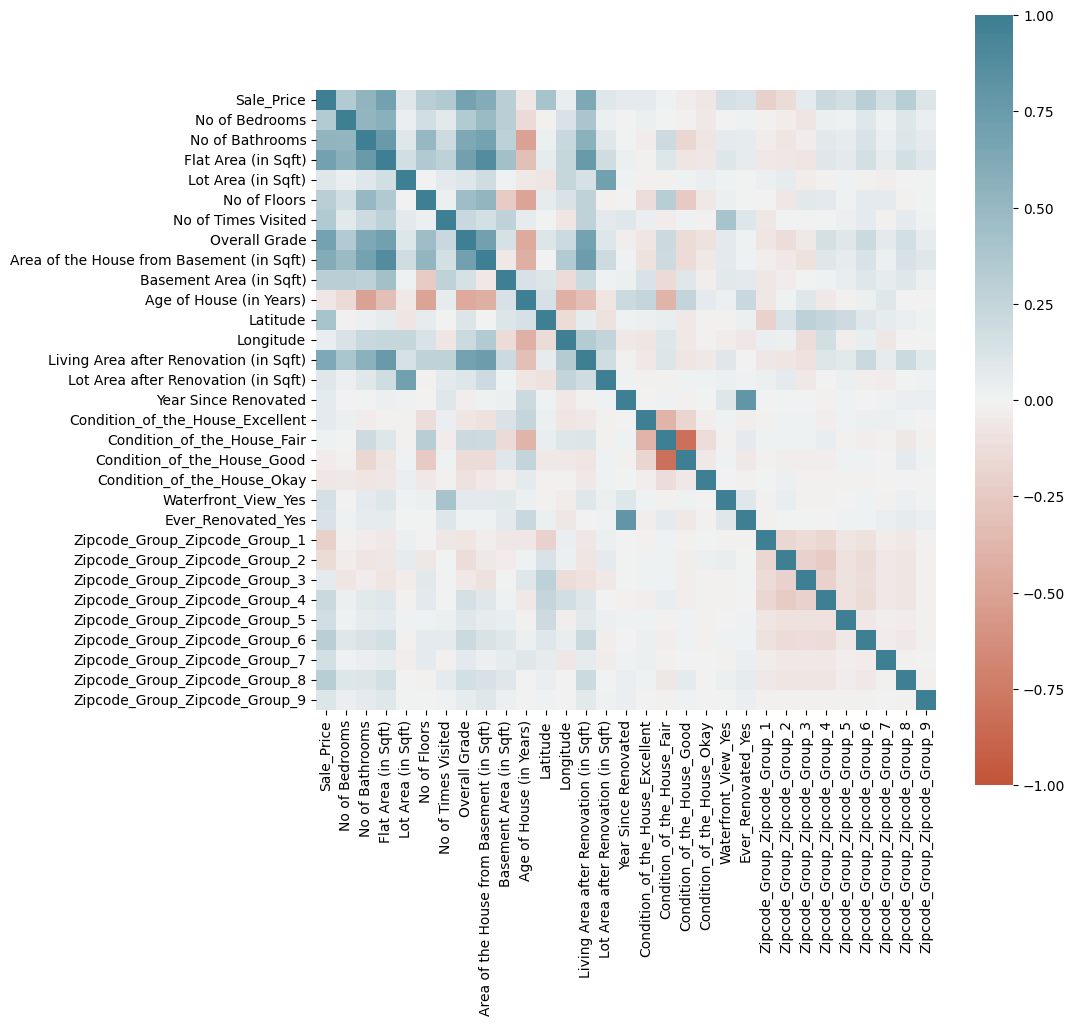

In [45]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(house_corr, 
    xticklabels = house_corr.columns.values, # x labels
    yticklabels = house_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

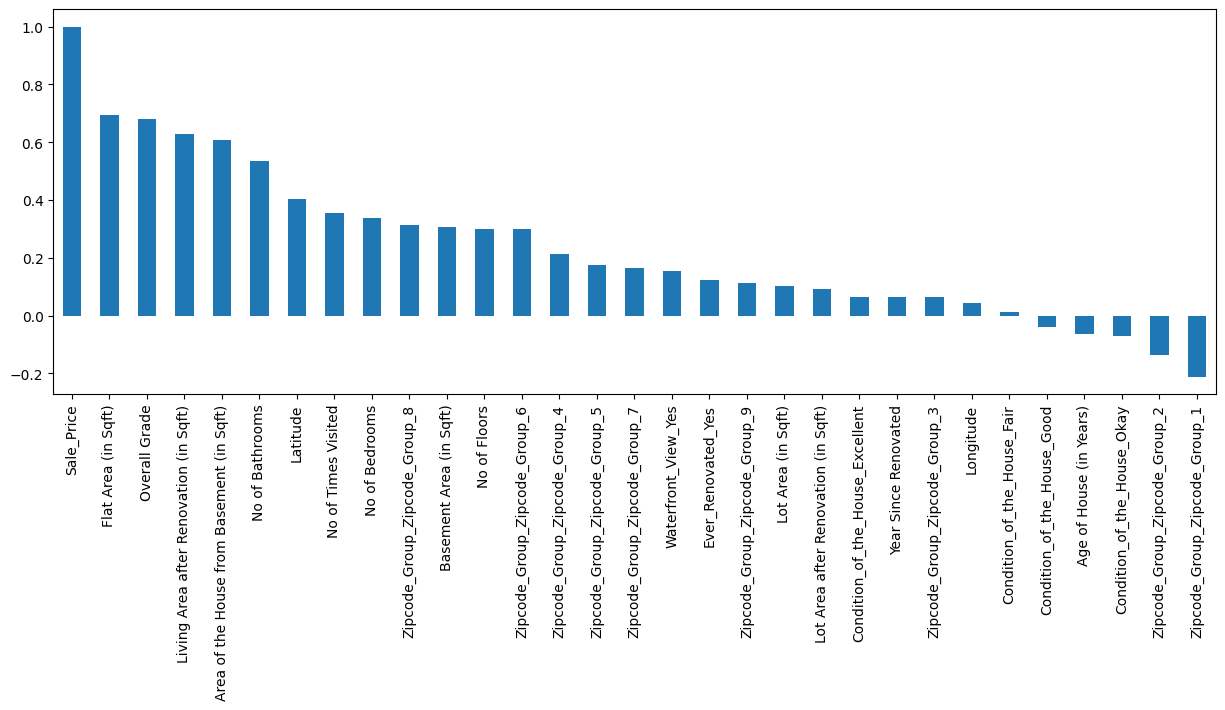

In [46]:
house_corr['Sale_Price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

In [47]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [48]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639469
No of Bathrooms                                 3.374716
Flat Area (in Sqft)                          1562.844886
Lot Area (in Sqft)                              2.108068
No of Floors                                    2.127712
No of Times Visited                             1.432393
Overall Grade                                   2.967508
Area of the House from Basement (in Sqft)    1271.671615
Basement Area (in Sqft)                       364.360177
Age of House (in Years)                         2.629408
Latitude                                        2.471395
Longitude                                       1.672677
Living Area after Renovation (in Sqft)          3.068245
Lot Area after Renovation (in Sqft)             2.144333
Year Since Renovated                            2.788105
Condition_of_the_House_Excellent               53.578090
Condition_of_the_House_Fair                   166.129924
Condition_of_the_House_Good    

In [49]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [50]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [51]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


No of Bedrooms  No of Bathrooms  Lot Area (in Sqft)  No of Floors  \
0       -0.398724        -1.447497           -0.228368     -0.915389   
1       -0.398724         0.175717           -0.189935      0.936817   
2       -1.474115        -1.447497           -0.123352     -0.915389   
3        0.676667         1.149646           -0.244060     -0.915389   
4       -0.398724        -0.148926           -0.169704     -0.915389   

   No of Times Visited  Overall Grade  \
0             -0.30579      -0.563993   
1             -0.30579      -0.563993   
2             -0.30579      -1.468566   
3             -0.30579      -0.563993   
4             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734765                -0.658697   
1                                   0.460954                 0.245134   
2                                  -1.229961                -0.658697   
3                                  -0.891778                 1.397518   
4                                  -0.130866                -0.658697   

   Age of House (in Years)  Latitude  ...  Ever_Renovated_Yes  \
0                 0.544734 -0.352572  ...           -0.210155   
1                 0.680915  1.161649  ...            4.758385   
2                 1.293731  1.283624  ...           -0.210155   
3                 0.204281 -0.283284  ...           -0.210155   
4                -0.544715  0.409591  ...           -0.210155   

   Zipcode_Group_Zipcode_Group_1  Zipcode_Group_Zipcode_Group_2  \
0                      -0.350481                      -0.482158   
1                      -0.350481                       2.074011   
2                      -0.350481                       2.074011   
3                      -0.350481                      -0.482158   
4                      -0.350481                      -0.482158   

   Zipcode_Group_Zipcode_Group_3  Zipcode_Group_Zipcode_Group_4  \
0                      -0.419600                      -0.479094   
1                      -0.419600                      -0.479094   
2                      -0.419600                      -0.479094   
3                       2.383223                      -0.479094   
4                      -0.419600                       2.087275   

   Zipcode_Group_Zipcode_Group_5  Zipcode_Group_Zipcode_Group_6  \
0                      -0.214086                      -0.287712   
1                      -0.214086                      -0.287712   
2                      -0.214086                      -0.287712   
3                      -0.214086                      -0.287712   
4                      -0.214086                      -0.287712   

   Zipcode_Group_Zipcode_Group_7  Zipcode_Group_Zipcode_Group_8  \
0                      -0.112274                       -0.16885   
1                      -0.112274                       -0.16885   
2                      -0.112274                       -0.16885   
3                      -0.112274                       -0.16885   
4                      -0.112274                       -0.16885   

   Zipcode_Group_Zipcode_Group_9  
0                      -0.048158  
1                      -0.048158  
2                      -0.048158  
3                      -0.048158  
4                      -0.048158  

[5 rows x 28 columns]

In [52]:
#remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                               1.638996
No of Bathrooms                              3.373697
Lot Area (in Sqft)                           2.107484
No of Floors                                 2.127632
No of Times Visited                          1.432369
Overall Grade                                2.957083
Area of the House from Basement (in Sqft)    4.580409
Basement Area (in Sqft)                      1.974965
Age of House (in Years)                      2.626375
Latitude                                     2.471300
Longitude                                    1.672653
Living Area after Renovation (in Sqft)       3.063985
Lot Area after Renovation (in Sqft)          2.144054
Year Since Renovated                         2.788073
Condition_of_the_House_Excellent             1.206482
Condition_of_the_House_Good                  1.251486
Condition_of_the_House_Okay                  1.025385
Waterfront_View_Yes                          1.208288
Ever_Renovated_Yes          

In [53]:
#X=vif_data[['No of Bedrooms','No of Bathrooms','Lot Area (in Sqft)','No of Floors','Overall Grade','Age of House (in Years)','Year Since Renovated','Ever_Renovated_Yes']]
X=vif_data
Y=data['Sale_Price']

In [54]:
X.head()

No of Bedrooms  No of Bathrooms  Lot Area (in Sqft)  No of Floors  \
0       -0.398724        -1.447497           -0.228368     -0.915389   
1       -0.398724         0.175717           -0.189935      0.936817   
2       -1.474115        -1.447497           -0.123352     -0.915389   
3        0.676667         1.149646           -0.244060     -0.915389   
4       -0.398724        -0.148926           -0.169704     -0.915389   

   No of Times Visited  Overall Grade  \
0             -0.30579      -0.563993   
1             -0.30579      -0.563993   
2             -0.30579      -1.468566   
3             -0.30579      -0.563993   
4             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734765                -0.658697   
1                                   0.460954                 0.245134   
2                                  -1.229961                -0.658697   
3                                  -0.891778                 1.397518   
4                                  -0.130866                -0.658697   

   Age of House (in Years)  Latitude  ...  Ever_Renovated_Yes  \
0                 0.544734 -0.352572  ...           -0.210155   
1                 0.680915  1.161649  ...            4.758385   
2                 1.293731  1.283624  ...           -0.210155   
3                 0.204281 -0.283284  ...           -0.210155   
4                -0.544715  0.409591  ...           -0.210155   

   Zipcode_Group_Zipcode_Group_1  Zipcode_Group_Zipcode_Group_2  \
0                      -0.350481                      -0.482158   
1                      -0.350481                       2.074011   
2                      -0.350481                       2.074011   
3                      -0.350481                      -0.482158   
4                      -0.350481                      -0.482158   

   Zipcode_Group_Zipcode_Group_3  Zipcode_Group_Zipcode_Group_4  \
0                      -0.419600                      -0.479094   
1                      -0.419600                      -0.479094   
2                      -0.419600                      -0.479094   
3                       2.383223                      -0.479094   
4                      -0.419600                       2.087275   

   Zipcode_Group_Zipcode_Group_5  Zipcode_Group_Zipcode_Group_6  \
0                      -0.214086                      -0.287712   
1                      -0.214086                      -0.287712   
2                      -0.214086                      -0.287712   
3                      -0.214086                      -0.287712   
4                      -0.214086                      -0.287712   

   Zipcode_Group_Zipcode_Group_7  Zipcode_Group_Zipcode_Group_8  \
0                      -0.112274                       -0.16885   
1                      -0.112274                       -0.16885   
2                      -0.112274                       -0.16885   
3                      -0.112274                       -0.16885   
4                      -0.112274                       -0.16885   

   Zipcode_Group_Zipcode_Group_9  
0                      -0.048158  
1                      -0.048158  
2                      -0.048158  
3                      -0.048158  
4                      -0.048158  

[5 rows x 28 columns]

In [55]:
data_n=X

In [56]:
data_n['Sale_Price']=Y

In [57]:
data_n.head()

No of Bedrooms  No of Bathrooms  Lot Area (in Sqft)  No of Floors  \
0       -0.398724        -1.447497           -0.228368     -0.915389   
1       -0.398724         0.175717           -0.189935      0.936817   
2       -1.474115        -1.447497           -0.123352     -0.915389   
3        0.676667         1.149646           -0.244060     -0.915389   
4       -0.398724        -0.148926           -0.169704     -0.915389   

   No of Times Visited  Overall Grade  \
0             -0.30579      -0.563993   
1             -0.30579      -0.563993   
2             -0.30579      -1.468566   
3             -0.30579      -0.563993   
4             -0.30579       0.340581   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                  -0.734765                -0.658697   
1                                   0.460954                 0.245134   
2                                  -1.229961                -0.658697   
3                                  -0.891778                 1.397518   
4                                  -0.130866                -0.658697   

   Age of House (in Years)  Latitude  ...  Zipcode_Group_Zipcode_Group_1  \
0                 0.544734 -0.352572  ...                      -0.350481   
1                 0.680915  1.161649  ...                      -0.350481   
2                 1.293731  1.283624  ...                      -0.350481   
3                 0.204281 -0.283284  ...                      -0.350481   
4                -0.544715  0.409591  ...                      -0.350481   

   Zipcode_Group_Zipcode_Group_2  Zipcode_Group_Zipcode_Group_3  \
0                      -0.482158                      -0.419600   
1                       2.074011                      -0.419600   
2                       2.074011                      -0.419600   
3                      -0.482158                       2.383223   
4                      -0.482158                      -0.419600   

   Zipcode_Group_Zipcode_Group_4  Zipcode_Group_Zipcode_Group_5  \
0                      -0.479094                      -0.214086   
1                      -0.479094                      -0.214086   
2                      -0.479094                      -0.214086   
3                      -0.479094                      -0.214086   
4                       2.087275                      -0.214086   

   Zipcode_Group_Zipcode_Group_6  Zipcode_Group_Zipcode_Group_7  \
0                      -0.287712                      -0.112274   
1                      -0.287712                      -0.112274   
2                      -0.287712                      -0.112274   
3                      -0.287712                      -0.112274   
4                      -0.287712                      -0.112274   

   Zipcode_Group_Zipcode_Group_8  Zipcode_Group_Zipcode_Group_9  Sale_Price  
0                       -0.16885                      -0.048158    221900.0  
1                       -0.16885                      -0.048158    538000.0  
2                       -0.16885                      -0.048158    180000.0  
3                       -0.16885                      -0.048158    604000.0  
4                       -0.16885                      -0.048158    510000.0  

[5 rows x 29 columns]

In [58]:

data_n.to_csv('transformed_house_price2.csv',index=False)
